In [1]:
import pandas as pd
import env
import wrangle as w
import explore as exp
import visuals as vis
import model as mdl

# import numpy as np
# from scipy.stats import chi2_contingency
# from sklearn.model_selection import train_test_split
# from sklearn.cluster import DBSCAN
# from sklearn.feature_selection import SelectKBest, f_regression, RFE
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.preprocessing import MinMaxScaler


In [2]:
# Example usage:
app_token = env.app_token
year_to_retrieve = '2022'
max_req = 2000  # Specify the maximum number of observations to retrieve


In [3]:
df = w.wrangle_coll_stage1(year_to_retrieve, app_token)

CSV file for 2022 already exists. Loading data from the CSV.


In [4]:
# df.to_csv('preprocessed_df.csv', index=False)

In [5]:
df.head()

,crash_datetime,crash_date,crash_time,collision_id,latitude,longitude,on_street_name,borough,zip_code,injuries_count,...,deaths,vehicle_1_category,vehicle_2_category,factors_category_vehicle_1,factors_category_vehicle_2,factors_subcat_vehicle_1,factors_subcat_vehicle_2,factors_subcat_vehicles,factors_category_vehicles,vehicles
0,2022-01-01 05:17:00,2022-01-01,05:17:00,4491857,40.746930,-73.84866,grand central pkwy,queens,11368,1,...,False,personal,personal,driver_related,driver_related,driving violations,driving violations,driving violations,driver_related,personal_to_personal
1,2022-01-01 01:30:00,2022-01-01,01:30:00,4491344,40.819157,-73.96038,henry hudson parkway,manhattan,10027,0,...,False,personal,personal,unspecified,unspecified,unspecified,unspecified,unspecified,unspecified,personal_to_personal
2,2022-01-01 16:40:00,2022-01-01,16:40:00,4491478,40.806107,-73.91799,saint ann's avenue,bronx,10454,0,...,False,personal,personal,unspecified,unspecified,unspecified,unspecified,unspecified,unspecified,personal_to_personal
3,2022-01-01 02:53:00,2022-01-01,02:53:00,4491586,40.646034,-73.99678,40th street,brooklyn,11232,0,...,False,personal,personal,unspecified,unspecified,unspecified,unspecified,unspecified,unspecified,personal_to_personal
4,2022-01-01 17:00:00,2022-01-01,17:00:00,4491660,40.701195,-73.91409,wyckoff avenue,brooklyn,11237,0,...,False,personal,personal,driver_related,unspecified,driving violations,unspecified,driving violations,driver_related,personal_to_personal


In [6]:
df.vehicles.unique()

array(['personal_to_personal', 'commercial_to_commercial',
       'personal_to_two-wheelers', 'commercial_to_personal',
       'commercial_to_two-wheelers', 'personal_to_commercial',
       'two-wheelers_to_personal', 'personal_to_other',
       'other_to_personal', 'other_to_other', 'commercial_to_other',
       'other_to_commercial', 'other_to_two-wheelers',
       'two-wheelers_to_two-wheelers', 'two-wheelers_to_commercial',
       'two-wheelers_to_other'], dtype=object)

In [7]:
rows_with_nan = df[df['vehicles'].isna()]
rows_with_nan

,crash_datetime,crash_date,crash_time,collision_id,latitude,longitude,on_street_name,borough,zip_code,injuries_count,...,deaths,vehicle_1_category,vehicle_2_category,factors_category_vehicle_1,factors_category_vehicle_2,factors_subcat_vehicle_1,factors_subcat_vehicle_2,factors_subcat_vehicles,factors_category_vehicles,vehicles


In [8]:
# Example usage:
info_dataframe = exp.create_info_dataframe(df)  # Assuming data_df is your DataFrame
info_dataframe

,Column,Null_Count,Null_Percentage,Zero_Count,Blank_Count,Unique_Values,Data_Type
0,crash_datetime,0,0.0,0,0,41429,datetime64[ns]
1,crash_date,0,0.0,0,0,365,datetime64[ns]
2,crash_time,0,0.0,0,0,1440,object
3,collision_id,0,0.0,0,0,48254,int64
4,latitude,0,0.0,0,0,23107,float64
5,longitude,0,0.0,0,0,19572,float64
6,on_street_name,0,0.0,0,0,4518,object
7,borough,1,0.0,0,0,5,object
8,zip_code,0,0.0,0,0,211,int64
9,injuries_count,0,0.0,32376,0,14,int64


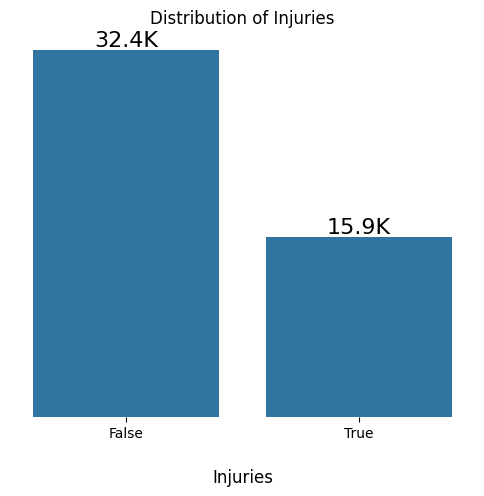

In [9]:
vis.injuries_dist(df)

### Vehicle Category
**Null Hypothesis**: The category of vehicles involved is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The category of vehicles involved is not independent of the occurrence of injuries in vehicle crashes.

In [10]:
# combine the 2 vehicle category columns
adjusted_vehicle_category_df = pd.DataFrame({'combined_vehicle_category': df['vehicle_1_category'].tolist() + df['vehicle_2_category'].tolist(),
                                             'injuries': [0.5 if x else 0 for x in df['injuries'].tolist()] * 2})

# Aggregate the adjusted data by 'combined_vehicle_category'
agg_adjusted_vehicle_category = adjusted_vehicle_category_df.groupby('combined_vehicle_category')['injuries'].sum().reset_index()


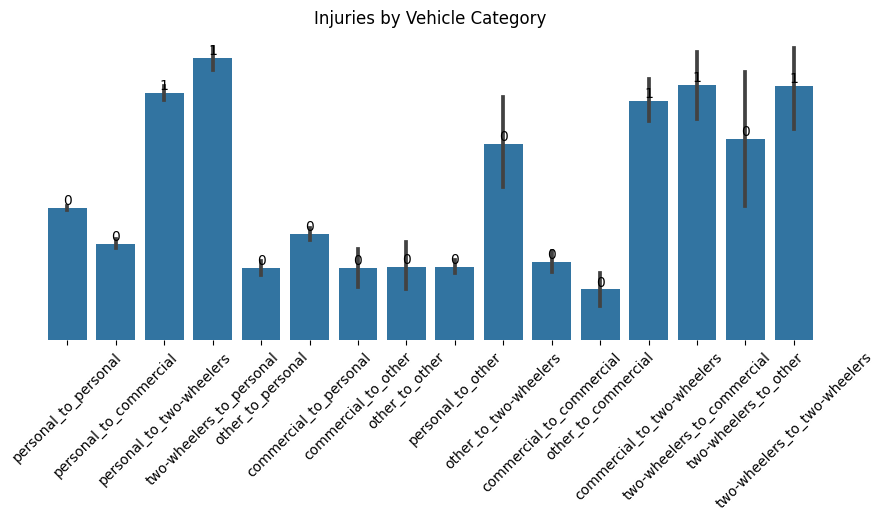

In [11]:
# Generate the modified plot for 'combined_vehicle_category' with adjusted injury counts and new formatting
vis.customized_barplot_v4(x='vehicles', y='injuries', data=df, 
                      title='Injuries by Vehicle Category', xlabel='', 
                      x_label_rotation=45, bar_font_size=10, figsize=(10, 4))

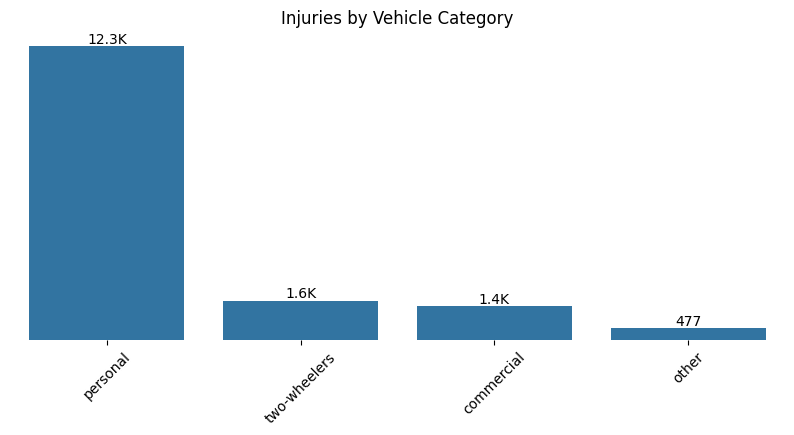

In [12]:
# Generate the modified plot for 'combined_vehicle_category' with adjusted injury counts and new formatting
vis.customized_barplot_v4(x='combined_vehicle_category', y='injuries', data=agg_adjusted_vehicle_category, 
                      title='Injuries by Vehicle Category', xlabel='', 
                      x_label_rotation=45, bar_font_size=10, figsize=(10, 4))

In [13]:
# Test the modified function with 'vehicle_1_category' and 'injuries'
print("Chi-Square Test for 'vehicle_1_category' and 'injuries':")
exp.chi_square_test(adjusted_vehicle_category_df, 'injuries', 'combined_vehicle_category')

Chi-Square Test for 'vehicle_1_category' and 'injuries':
p-value: 0.0
r-value: 0.17

Interpretation:
Reject the null hypothesis.
The r-value suggests a medium effect size.


### Factor Category
**Null Hypothesis**: The contributing factors category is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The contributing factors category is not independent of the occurrence of injuries in vehicle crashes.

In [14]:
# Adjust the 'injuries' column in the aggregated data to count each injury occurrence as 0.5
adjusted_factors_category_df = pd.DataFrame({'combined_factors_category': df['factors_category_vehicle_1'].tolist() + df['factors_category_vehicle_2'].tolist(),
                                             'injuries': [0.5 if x else 0 for x in df['injuries'].tolist()] * 2})

adjusted_factors_subcat_df = pd.DataFrame({'combined_factors_subcat': df['factors_subcat_vehicle_1'].tolist() + df['factors_subcat_vehicle_2'].tolist(),
                                           'injuries': [0.5 if x else 0 for x in df['injuries'].tolist()] * 2})

# Aggregate the adjusted data by 'combined_factors_category' and 'combined_factors_subcat'
agg_adjusted_factors_category = adjusted_factors_category_df.groupby('combined_factors_category')['injuries'].sum().reset_index()
agg_adjusted_factors_subcat = adjusted_factors_subcat_df.groupby('combined_factors_subcat')['injuries'].sum().reset_index()



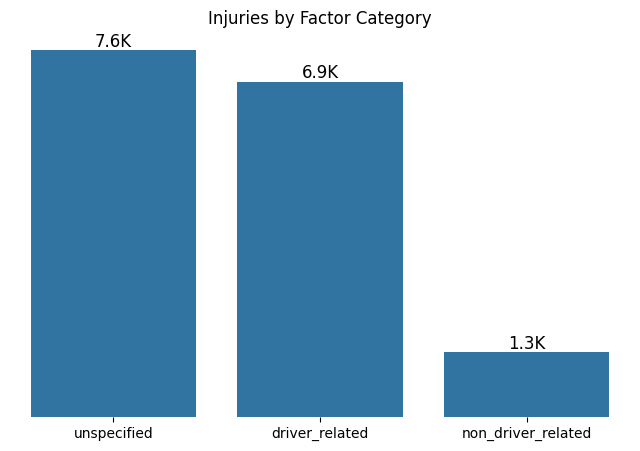

In [15]:
# Generate the plots for 'combined_factors_category' and 'combined_factors_subcat' with adjusted injury counts
vis.customized_barplot_v4(x='combined_factors_category', y='injuries', data=agg_adjusted_factors_category, 
                   title='Injuries by Factor Category', xlabel='', 
                      x_label_rotation=0, bar_font_size=12, figsize=(8, 5))

In [16]:
# Conduct and interpret Chi-Square Test for 'combined_factors_category' and 'injuries'
print("Chi-Square Test for 'combined_factors_category' and 'injuries':")
exp.chi_square_test(adjusted_factors_category_df, 'injuries', 'combined_factors_category')

Chi-Square Test for 'combined_factors_category' and 'injuries':
p-value: 1.5763510664149358e-75
r-value: 0.06

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Factors Subcategory
**Null Hypothesis**: The contributing factors subcategory is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The contributing factors subcategory is not independent of the occurrence of injuries in vehicle crashes.

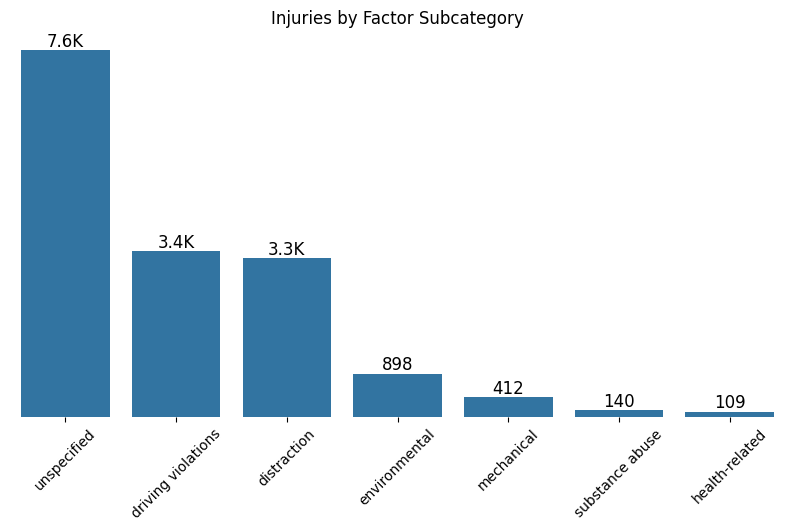

In [17]:
vis.customized_barplot_v4(x='combined_factors_subcat', y='injuries', data=agg_adjusted_factors_subcat, 
                      title='Injuries by Factor Subcategory', xlabel='', 
                      x_label_rotation=45, bar_font_size=12, figsize=(10, 5))

In [18]:
# Conduct and interpret Chi-Square Test for 'combined_factors_subcat' and 'injuries'
print("\nChi-Square Test for 'combined_factors_subcat' and 'injuries':")
exp.chi_square_test(adjusted_factors_subcat_df, 'injuries', 'combined_factors_subcat')



Chi-Square Test for 'combined_factors_subcat' and 'injuries':
p-value: 1.8004063532261264e-103
r-value: 0.07

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


In [19]:
# Convert 'crash_datetime' to a datetime object
df['crash_datetime'] = pd.to_datetime(df['crash_datetime'])

# Extract time-based features from 'crash_datetime'
df['hour_of_day'] = df['crash_datetime'].dt.hour
df['day_of_week'] = df['crash_datetime'].dt.day_name()
df['month'] = df['crash_datetime'].dt.month_name()

# Create a 'daylight' column, set to True if the hour is between 06 and 19, otherwise False
df['daylight'] = (df['hour_of_day'] >= 6) & (df['hour_of_day'] <= 19)

# the 'daylight_day_of_week' column to use 'Day' and 'Night' instead of True and False
df['daylight_day_of_week'] = df['day_of_week'] + '_' + df['daylight'].map({True: 'Day', False: 'Night'})


### Hour of Day
**Null Hypothesis**: The hour of the day is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The hour of the day is not independent of the occurrence of injuries in vehicle crashes.


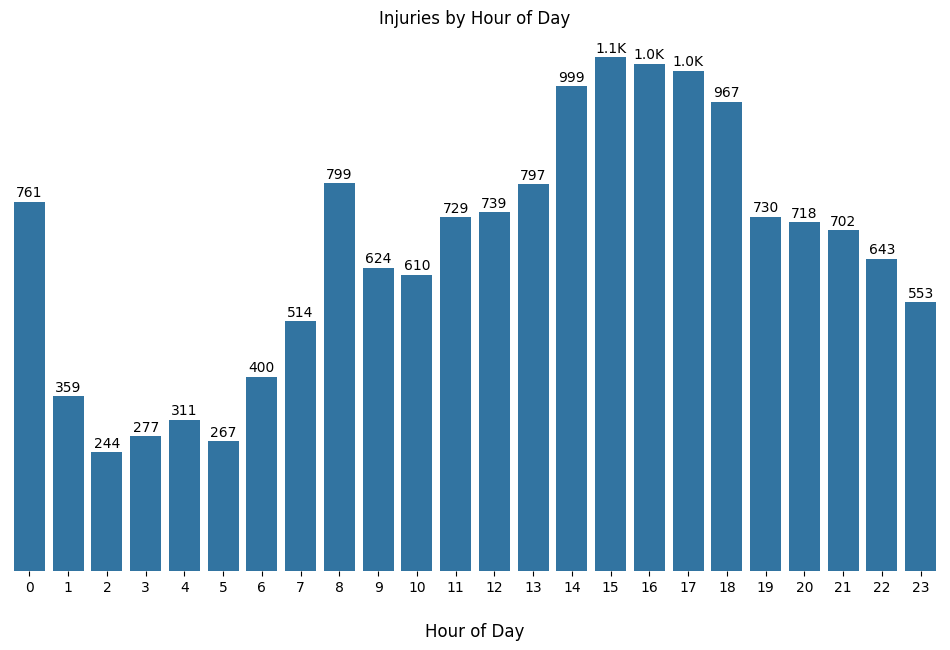

In [20]:
# Aggregate the data for the new time-based features
agg_hour_of_day = df.groupby('hour_of_day')['injuries'].sum().reset_index()
agg_day_of_week = df.groupby('day_of_week')['injuries'].sum().reset_index()
agg_daylight = df.groupby('daylight')['injuries'].sum().reset_index()
agg_daylight_day_of_week = df.groupby('daylight_day_of_week')['injuries'].sum().reset_index()

# Generate bar plots for the new features
vis.customized_barplot_v4(x='hour_of_day', y='injuries', data=agg_hour_of_day, 
                      title='Injuries by Hour of Day', xlabel='Hour of Day', 
                      x_label_rotation=0, bar_font_size=10, figsize=(12, 7))


In [21]:

print("Chi-Square Test for 'hour_of_day':")
exp.chi_square_test(df, 'injuries', 'hour_of_day')


Chi-Square Test for 'hour_of_day':
p-value: 3.0065722439640336e-23
r-value: 0.06

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Day of Week
**Null Hypothesis**: The day of the week is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The day of the week is not independent of the occurrence of injuries in vehicle crashes.

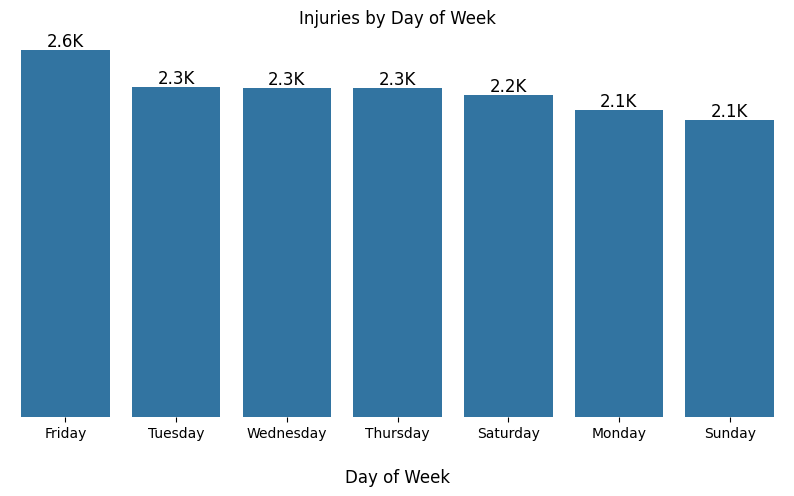

In [22]:
vis.customized_barplot_v4(x='day_of_week', y='injuries', data=agg_day_of_week, 
                      title='Injuries by Day of Week', xlabel='Day of Week', 
                      x_label_rotation=0, bar_font_size=12, figsize=(10, 5))


In [23]:
print("\nChi-Square Test for 'day_of_week':")
exp.chi_square_test(df, 'injuries', 'day_of_week')



Chi-Square Test for 'day_of_week':
p-value: 0.07266814052507678
r-value: 0.02

Interpretation:
Fail to reject the null hypothesis.
The r-value suggests a small effect size.


### Daylight
**Null Hypothesis**: The presence of daylight is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The presence of daylight is not independent of the occurrence of injuries in vehicle crashes.

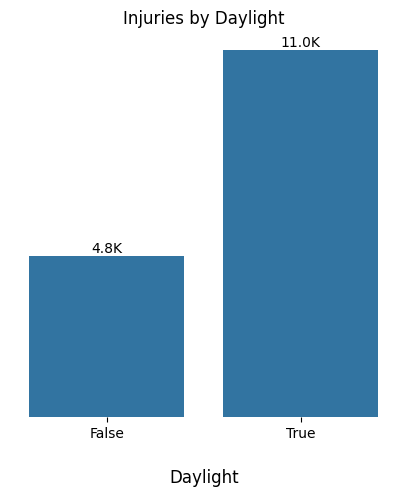

In [24]:
vis.customized_barplot_v4(x='daylight', y='injuries', data=agg_daylight, 
                      title='Injuries by Daylight', xlabel='Daylight', 
                      x_label_rotation=0, bar_font_size=10, figsize=(5, 5))


In [25]:
print("\nChi-Square Test for 'daylight':")
exp.chi_square_test(df, 'injuries', 'daylight')



Chi-Square Test for 'daylight':
p-value: 1.43316788659377e-06
r-value: 0.02

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Daylight & Day of Week Combined
**Null Hypothesis**: The combination of daylight and day of the week is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The combination of daylight and day of the week is not independent of the occurrence of injuries in vehicle crashes.

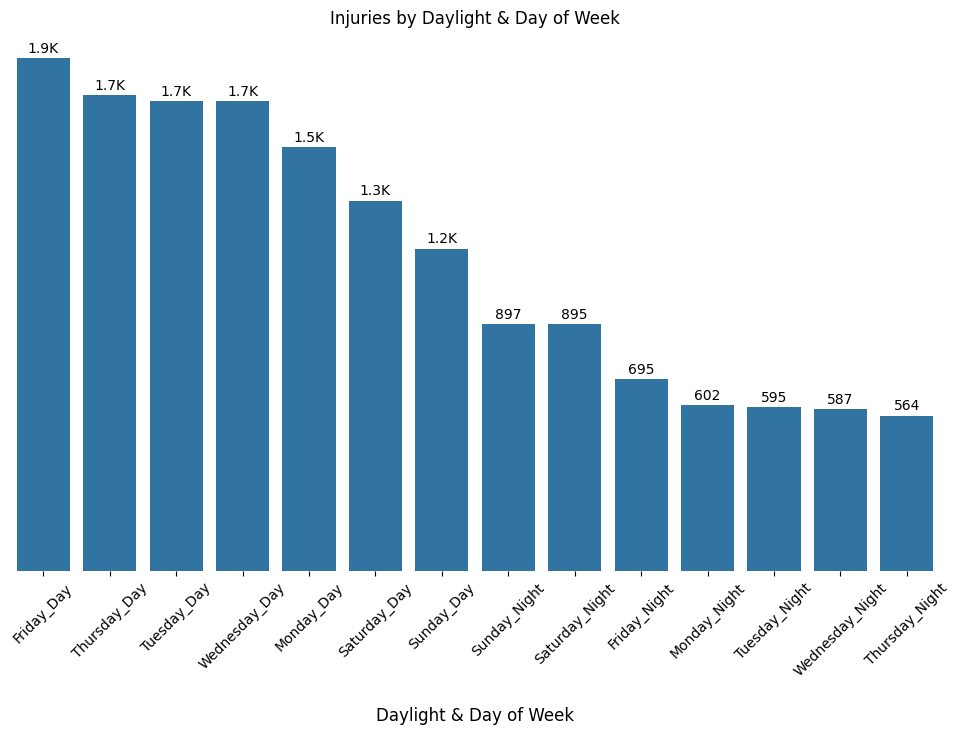

In [26]:
vis.customized_barplot_v4(x='daylight_day_of_week', y='injuries', data=agg_daylight_day_of_week, 
                      title='Injuries by Daylight & Day of Week', xlabel='Daylight & Day of Week', 
                      x_label_rotation=45, bar_font_size=10, figsize=(12, 7))


In [27]:
print("\nChi-Square Test for 'daylight_day_of_week':")
exp.chi_square_test(df, 'injuries', 'daylight_day_of_week')



Chi-Square Test for 'daylight_day_of_week':
p-value: 2.1339268396194903e-08
r-value: 0.04

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### Borough
**Null Hypothesis**: The borough in which the crash occurs is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The borough in which the crash occurs is not independent of the occurrence of injuries in vehicle crashes.


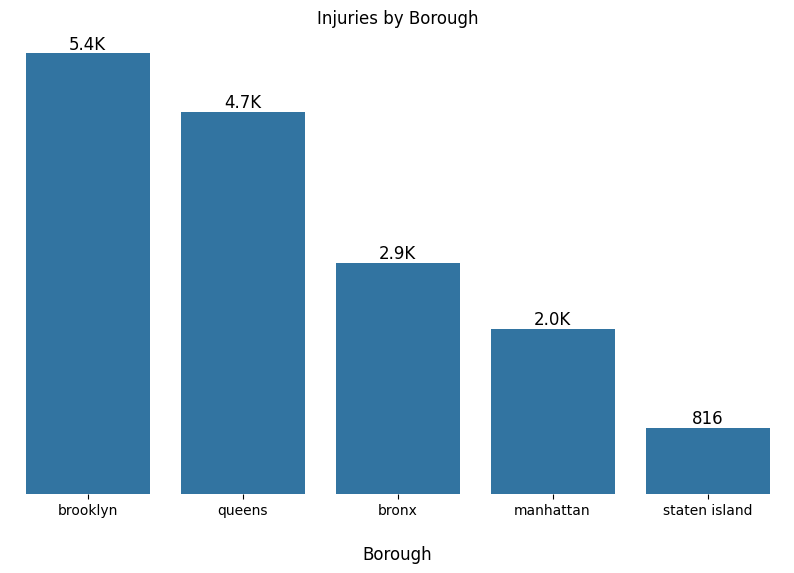

In [28]:
# Aggregate the data for the new location-based features
agg_borough = df.groupby('borough')['injuries'].sum().reset_index()

# Generate bar plots for the new location-based features
vis.customized_barplot_v4(x='borough', y='injuries', data=agg_borough, 
                      title='Injuries by Borough', xlabel='Borough')

In [29]:
# Conduct Chi-Square Tests for the new location-based features
print("Chi-Square Test for 'borough':")
exp.chi_square_test(df, 'injuries', 'borough')


Chi-Square Test for 'borough':
p-value: 3.492703421519629e-67
r-value: 0.08

Interpretation:
Reject the null hypothesis.
The r-value suggests a small effect size.


### ZIP Code
**Null Hypothesis**: The ZIP code in which the crash occurs is independent of the occurrence of injuries in vehicle crashes.  
**Alternative Hypothesis**: The ZIP code in which the crash occurs is not independent of the occurrence of injuries in vehicle crashes.


In [30]:
import json
import geopandas as gpd
import folium

# Aggregate data by ZIP code, calculating the mean latitude and longitude and summing the injuries
# agg_zip_geo = df.groupby('zip_code').agg({
#     'latitude': 'mean',
#     'longitude': 'mean',
#     'injuries': 'sum'
# }).reset_index()

agg_zip_geo = df.groupby('zip_code')['injuries'].sum().reset_index()

geo_df = gpd.read_file('new-york-zip-codes-_1604.geojson')
    
# Convert ZCTA5CE10 to integer for merging
geo_df['ZCTA5CE10'] = geo_df['ZCTA5CE10'].astype(int)

# Merge the GeoDataFrame with the original DataFrame on ZIP code
merged_df = geo_df.merge(agg_zip_geo, left_on="ZCTA5CE10", right_on="zip_code")

# Create a Folium map centered around NYC
m_zip_geo = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add the GeoJSON layer to the map
folium.Choropleth(
    geo_data=merged_df,
    name='choropleth',
    data=merged_df,
    columns=['ZCTA5CE10', 'injuries'],
    key_on='feature.properties.ZCTA5CE10',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Injury Counts'
).add_to(m_zip_geo)

# Save the map to a file
#map_file_path = "m_zip_geo"
# m_zip_geo.save(map_file_path)
m_zip_geo
#map_file_path

# https://cartographyvectors.com/map/1604-new-york-zip-codes

In [31]:
# Conduct Chi-Square Test for 'zip_code'
print("Chi-Square Test for 'zip_code':")
exp.chi_square_test(df, 'injuries', 'zip_code')


Chi-Square Test for 'zip_code':
p-value: 1.7433991398140988e-95
r-value: 0.14

Interpretation:
Reject the null hypothesis.
The r-value suggests a medium effect size.


In [32]:
df = w.wrangle_coll_stage2(year_to_retrieve, app_token)

CSV file for 2022 already exists. Loading data from the CSV.


In [33]:
train, val, test = mdl.train_val_test_split(df)

In [34]:
train, val, test = mdl.create_cluster(train, val, test)

In [35]:
train, val, test = mdl.create_ref_date(train, val, test)

In [36]:
train, val, test = mdl.min_max_scaler (train, val, test)

In [37]:
train.columns

Index(['latitude', 'longitude', 'on_street_name', 'borough', 'zip_code',
       'injuries', 'vehicle_1_category', 'vehicle_2_category',
       'factors_category_vehicle_1', 'factors_category_vehicle_2',
       'factors_subcat_vehicle_1', 'factors_subcat_vehicle_2',
       'factors_subcat_vehicles', 'factors_category_vehicles', 'vehicles',
       'hour_of_day', 'day_of_week', 'month', 'daylight',
       'daylight_day_of_week', 'cluster', 'cluster_injury_count',
       'time_since_ref_date'],
      dtype='object')

In [38]:
train_encoded, val_encoded, testest_encodedt = mdl.hot_encode_fs(train, val, test)

In [39]:
train_encoded.columns

Index(['latitude', 'longitude', 'on_street_name', 'zip_code', 'injuries',
       'hour_of_day', 'daylight', 'cluster', 'cluster_injury_count',
       'time_since_ref_date',
       ...
       'daylight_day_of_week_Saturday_Day',
       'daylight_day_of_week_Saturday_Night',
       'daylight_day_of_week_Sunday_Day', 'daylight_day_of_week_Sunday_Night',
       'daylight_day_of_week_Thursday_Day',
       'daylight_day_of_week_Thursday_Night',
       'daylight_day_of_week_Tuesday_Day',
       'daylight_day_of_week_Tuesday_Night',
       'daylight_day_of_week_Wednesday_Day',
       'daylight_day_of_week_Wednesday_Night'],
      dtype='object', length=102)

In [34]:
feature_ranking = mdl.rfe_lasso(train)
feature_ranking

,RFE,Lasso
latitude,1,0.321670
longitude,1,0.564129
zip_code,1,0.656724
hour_of_day,2,0.293794
cluster,1,2.666416
cluster_injury_count,1,4.454324
time_since_ref_date,3,0.270265


___
___

## Modeling

___
___

In [35]:
# Calculate the baseline accuracy for the 'injuries' column
most_frequent_class = train['injuries'].value_counts().idxmax()
baseline_accuracy = (train['injuries'] == most_frequent_class).mean()
# baseline_accuracy = round(baseline_accuracy * 100, 1)
baseline_accuracy


0.6709595286733576

In [36]:
train_encoded, val_encoded, test_encoded = mdl.hot_encode_mdl(train, val, test)

In [37]:
logistic_accuracy = mdl.logistic_reg(train_encoded, val_encoded)
logistic_accuracy

,Model,Train Accuracy (%),Validation Accuracy (%)
0,Logistic Regression,68.2,67.1


In [38]:
rf_accuracy = mdl.rand_forest(train_encoded, val_encoded)
rf_accuracy

,Model,Train Accuracy (%),Validation Accuracy (%)
0,Random Forest,100.0,68.5


In [39]:
gb_accuracy = mdl.gradient_boost(train_encoded, val_encoded)
gb_accuracy

,Model,Train Accuracy (%),Validation Accuracy (%)
0,Gradient Boosting,71.7,70.5


In [40]:
# Concatenate the accuracy results DataFrames vertically (along rows)
results = pd.concat([logistic_accuracy, rf_accuracy, gb_accuracy], ignore_index=True)

# Display the stacked results
results


,Model,Train Accuracy (%),Validation Accuracy (%)
0,Logistic Regression,68.2,67.1
1,Random Forest,100.0,68.5
2,Gradient Boosting,71.7,70.5


In [41]:
accuracy_results =  mdl.test_accuracy(test_encoded, 'GradientBoostingClassifier')
accuracy_results

0.6836579638071557

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def grid_search_random_forest(train_encoded, param_grid, cv=5):
    # Define the features and the target variable
    X_train = train_encoded.drop(['injuries'], axis=1).select_dtypes(include=['int64', 'float64', 'int32'])
    y_train = train_encoded['injuries']

    # Initialize the RandomForestClassifier
    rf_classifier = RandomForestClassifier(random_state=42)

    # Create a GridSearchCV object with the specified parameter grid and cross-validation
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv, scoring='accuracy')

    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the corresponding accuracy score
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    return best_params, best_accuracy


In [46]:

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform the GridSearchCV for RandomForestClassifier
best_params, best_accuracy = grid_search_random_forest(train_encoded, param_grid)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.6820913351029587


In [3]:
df = w.wrangle_coll_stage3(year_to_retrieve, app_token)

CSV file for 2022 already exists. Loading data from the CSV.


In [4]:
train, val, test = mdl.train_val_test_split(df)

In [5]:
train, val, test = mdl.create_ref_date(train, val, test)

In [6]:

from sklearn.preprocessing import TargetEncoder

# Initialize the TargetEncoder
target_encoder = TargetEncoder()

# Fit on the train dataset and transform all datasets
train['zip_code_encoded'] = target_encoder.fit_transform(train[['zip_code']], train['injuries'])
val['zip_code_encoded'] = target_encoder.transform(val[['zip_code']])
test['zip_code_encoded'] = target_encoder.transform(test[['zip_code']])

# Drop the original 'zip_code' column
train.drop('zip_code', axis=1, inplace=True)
val.drop('zip_code', axis=1, inplace=True)
test.drop('zip_code', axis=1, inplace=True)

# Show the first few rows of the transformed datasets
train.head()

,latitude,longitude,on_street_name,borough,injuries,factors_subcat_vehicles,factors_category_vehicles,vehicles,hour_of_day,day_of_week,month,daylight,daylight_day_of_week,time_since_ref_date,zip_code_encoded
19414,40.687553,-73.91868,broadway,brooklyn,False,unspecified,unspecified,two-wheelers_to_commercial,14,Friday,September,True,Friday_Day,258,0.347303
38015,40.724888,-73.89899,perry avenue,queens,False,unspecified,unspecified,personal_to_personal,17,Sunday,May,True,Sunday_Day,148,0.398642
53168,40.651104,-73.94381,church avenue,brooklyn,True,unspecified,unspecified,personal_to_personal,22,Friday,December,False,Friday_Night,349,0.435559
17572,40.751972,-73.93197,northern boulevard,queens,False,driving violations,driver_related,other_to_two-wheelers,21,Wednesday,August,False,Wednesday_Night,235,0.367014
24986,40.733280,-73.91078,58th street,queens,False,environmental,non_driver_related,commercial_to_personal,13,Wednesday,November,True,Wednesday_Day,333,0.392612


In [7]:
import numpy as np

# Apply sine and cosine transformations to 'hour_of_day'
train['hour_of_day_sin'] = np.sin(2 * np.pi * train['hour_of_day'] / 24)
train['hour_of_day_cos'] = np.cos(2 * np.pi * train['hour_of_day'] / 24)

val['hour_of_day_sin'] = np.sin(2 * np.pi * val['hour_of_day'] / 24)
val['hour_of_day_cos'] = np.cos(2 * np.pi * val['hour_of_day'] / 24)

test['hour_of_day_sin'] = np.sin(2 * np.pi * test['hour_of_day'] / 24)
test['hour_of_day_cos'] = np.cos(2 * np.pi * test['hour_of_day'] / 24)

# Drop the original 'hour_of_day' column
train.drop('hour_of_day', axis=1, inplace=True)
val.drop('hour_of_day', axis=1, inplace=True)
test.drop('hour_of_day', axis=1, inplace=True)

# Show the first few rows of the transformed datasets
train[['hour_of_day_sin', 'hour_of_day_cos']].head()

,hour_of_day_sin,hour_of_day_cos
19414,-0.500000,-0.866025
38015,-0.965926,-0.258819
53168,-0.500000,0.866025
17572,-0.707107,0.707107
24986,-0.258819,-0.965926


In [8]:
# Apply target encoding to the 'on_street_name' column
train['on_street_name_encoded'] = target_encoder.fit_transform(train[['on_street_name']], train['injuries'])
val['on_street_name_encoded'] = target_encoder.transform(val[['on_street_name']])
test['on_street_name_encoded'] = target_encoder.transform(test[['on_street_name']])

# Drop the original 'on_street_name' column
train.drop('on_street_name', axis=1, inplace=True)
val.drop('on_street_name', axis=1, inplace=True)
test.drop('on_street_name', axis=1, inplace=True)

# Show the first few rows of the transformed datasets
train[['on_street_name_encoded']].head()

,on_street_name_encoded
19414,0.377694
38015,0.000000
53168,0.481677
17572,0.440951
24986,0.121430


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Adding a small buffer around these
latitude_min, latitude_max = 40.0, 41.0
longitude_min, longitude_max = -75.0, -73.0

# Calculate the overall minimum and maximum values based on these boundaries
overall_min = min(latitude_min, longitude_min)
overall_max = max(latitude_max, longitude_max)

# Apply Min-Max scaling with the common scaling factor
def minmax_scale_with_aspect(value, overall_min, overall_max):
    return (value - overall_min) / (overall_max - overall_min)

# Re-apply Min-Max scaling with the new scaling factor
for col in ['latitude', 'longitude']:
    train[col + '_scaled'] = minmax_scale_with_aspect(train[col], overall_min, overall_max)
    val[col + '_scaled'] = minmax_scale_with_aspect(val[col], overall_min, overall_max)
    test[col + '_scaled'] = minmax_scale_with_aspect(test[col], overall_min, overall_max)


# Apply Min-Max Scaling to 'time_since_ref_date'
train['time_since_ref_date'] = minmax_scaler.fit_transform(train[['time_since_ref_date']])
val['time_since_ref_date'] = minmax_scaler.transform(val[['time_since_ref_date']])
test['time_since_ref_date'] = minmax_scaler.transform(test[['time_since_ref_date']])

# Show the first few rows of the transformed datasets
train[['latitude', 'longitude', 'time_since_ref_date']].head()

,latitude,longitude,time_since_ref_date
19414,40.687553,-73.91868,0.708791
38015,40.724888,-73.89899,0.406593
53168,40.651104,-73.94381,0.958791
17572,40.751972,-73.93197,0.645604
24986,40.733280,-73.91078,0.914835


In [10]:
# Apply one-hot encoding to the remaining categorical columns
categorical_columns = ['borough', 'factors_subcat_vehicles', 'factors_category_vehicles', 
                       'vehicles', 'day_of_week', 'month', 'daylight_day_of_week']

train = pd.get_dummies(train, columns=categorical_columns, drop_first=True)
val = pd.get_dummies(val, columns=categorical_columns, drop_first=True)
test = pd.get_dummies(test, columns=categorical_columns, drop_first=True)

# Align the train, val, and test data to ensure they have the same dummy columns
train, val = train.align(val, join='left', axis=1)
train, test = train.align(test, join='left', axis=1)

# Fill any resulting NaNs in val and test datasets with 0 (for missing columns after one-hot encoding)
val.fillna(0, inplace=True)
test.fillna(0, inplace=True)

# Show the first few rows of the transformed train dataset to verify
train.head()


,latitude,longitude,injuries,daylight,time_since_ref_date,zip_code_encoded,hour_of_day_sin,hour_of_day_cos,on_street_name_encoded,latitude_scaled,...,daylight_day_of_week_Saturday_Day,daylight_day_of_week_Saturday_Night,daylight_day_of_week_Sunday_Day,daylight_day_of_week_Sunday_Night,daylight_day_of_week_Thursday_Day,daylight_day_of_week_Thursday_Night,daylight_day_of_week_Tuesday_Day,daylight_day_of_week_Tuesday_Night,daylight_day_of_week_Wednesday_Day,daylight_day_of_week_Wednesday_Night
19414,40.687553,-73.91868,False,True,0.708791,0.347303,-0.500000,-0.866025,0.377694,0.997306,...,False,False,False,False,False,False,False,False,False,False
38015,40.724888,-73.89899,False,True,0.406593,0.398642,-0.965926,-0.258819,0.000000,0.997628,...,False,False,True,False,False,False,False,False,False,False
53168,40.651104,-73.94381,True,False,0.958791,0.435559,-0.500000,0.866025,0.481677,0.996992,...,False,False,False,False,False,False,False,False,False,False
17572,40.751972,-73.93197,False,False,0.645604,0.367014,-0.707107,0.707107,0.440951,0.997862,...,False,False,False,False,False,False,False,False,False,True
24986,40.733280,-73.91078,False,True,0.914835,0.392612,-0.258819,-0.965926,0.121430,0.997701,...,False,False,False,False,False,False,False,False,True,False


In [11]:
train.to_csv('train_scaled.csv', index=False)
val.to_csv('val_scaled.csv', index=False)
test.to_csv('test_scaled.csv', index=False)

In [46]:
train.head()

,latitude,longitude,borough,injuries,factors_subcat_vehicles,factors_category_vehicles,vehicles,day_of_week,month,daylight,daylight_day_of_week,time_since_ref_date,zip_code_encoded,hour_of_day_sin,hour_of_day_cos,on_street_name_encoded
19414,40.687553,-73.91868,brooklyn,False,unspecified,unspecified,two-wheelers_to_commercial,Friday,September,True,Friday_Day,258,0.346796,-0.500000,-0.866025,0.391122
38015,40.724888,-73.89899,queens,False,unspecified,unspecified,personal_to_personal,Sunday,May,True,Sunday_Day,148,0.387260,-0.965926,-0.258819,0.000000
53168,40.651104,-73.94381,brooklyn,True,unspecified,unspecified,personal_to_personal,Friday,December,False,Friday_Night,349,0.434062,-0.500000,0.866025,0.481677
17572,40.751972,-73.93197,queens,False,driving violations,driver_related,other_to_two-wheelers,Wednesday,August,False,Wednesday_Night,235,0.344401,-0.707107,0.707107,0.426990
24986,40.733280,-73.91078,queens,False,environmental,non_driver_related,commercial_to_personal,Wednesday,November,True,Wednesday_Day,333,0.397817,-0.258819,-0.965926,0.121430


In [11]:
from sklearn.metrics import accuracy_score
import pandas as pd

def train_and_evaluate_model(train, val, classifier):
    # Splitting the data into features and target variables
    X_train = train.drop('injuries', axis=1)
    y_train = train['injuries']
    X_val = val.drop('injuries', axis=1)
    y_val = val['injuries']
    
    # Initialize and train the classifier
    clf = classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on train and validation sets
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    # Calculate accuracy scores for train and validation sets
    train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 1)
    val_accuracy = round(accuracy_score(y_val, y_val_pred) * 100, 1)
    
    # Prepare the results as a DataFrame
    results_df = pd.DataFrame({
        'Model': [clf.__class__.__name__],
        'Train (%)': [train_accuracy],
        'Validation (%)': [val_accuracy]
    })
    
    return results_df


In [13]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier




,Model,Train (%),Validation (%)
0,LogisticRegression,70.1,70.2


In [41]:
# Initialize classifiers with specific hyperparameters
clf_lr = LogisticRegression(random_state=42, max_iter=1000)
# Evaluate Logistic Regression
result_lr = train_and_evaluate_model(train, val, clf_lr)
result_lr


,Model,Train (%),Validation (%)
0,LogisticRegression,70.1,70.2


In [14]:
# Initialize classifiers with specific hyperparameters
clf_rf = RandomForestClassifier(random_state=42)
# Evaluate Random Forest
result_rf = train_and_evaluate_model(train, val, clf_rf)
result_rf


,Model,Train (%),Validation (%)
0,RandomForestClassifier,100.0,69.2


In [15]:
# Initialize classifiers with specific hyperparameters
clf_gb = GradientBoostingClassifier(random_state=42)
# Evaluate Gradient Boosting
result_gb = train_and_evaluate_model(train, val, clf_gb)
result_gb


,Model,Train (%),Validation (%)
0,GradientBoostingClassifier,70.8,70.2


In [16]:
# Initialize classifiers with specific hyperparameters
clf_svm = SVC(random_state=42)
# Evaluate Support Vector Machine
result_svm = train_and_evaluate_model(train, val, clf_svm)
result_svm

,Model,Train (%),Validation (%)
0,SVC,67.1,67.1


In [33]:
import numpy as np

def train_and_evaluate_knn(train, val, classifier):
    # Convert DataFrames to C-contiguous NumPy arrays
    X_train = np.ascontiguousarray(train.drop('injuries', axis=1).values)
    y_train = np.ascontiguousarray(train['injuries'].values)
    X_val = np.ascontiguousarray(val.drop('injuries', axis=1).values)
    y_val = np.ascontiguousarray(val['injuries'].values)
    
    # Initialize and train the classifier
    clf = classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on train and validation sets
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    
    # Calculate accuracy scores for train and validation sets
    train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 1)
    val_accuracy = round(accuracy_score(y_val, y_val_pred) * 100, 1)
    
    # Prepare the results as a DataFrame
    results_df = pd.DataFrame({
        'Model': [clf.__class__.__name__],
        'Train (%)': [train_accuracy],
        'Validation (%)': [val_accuracy]
    })
    
    return results_df

# Example usage code (you can run this in your environment)
# clf_knn = KNeighborsClassifier()
# result_knn = train_and_evaluate_knn(train, val, clf_knn)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier
clf_knn = KNeighborsClassifier()

# Evaluate k-NN
result_knn = train_and_evaluate_knn(train, val, clf_knn)
result_knn


,Model,Train (%),Validation (%)
0,KNeighborsClassifier,75.1,64.1


In [23]:
# Initialize classifiers with specific hyperparameters
clf_nn = MLPClassifier(random_state=42, max_iter=1000)
# Evaluate Neural Network
result_nn = train_and_evaluate_model(train, val, clf_nn)
result_nn

,Model,Train (%),Validation (%)
0,MLPClassifier,69.9,69.8


In [35]:
results_list = [result_lr, result_rf, result_gb, result_svm, result_knn, result_nn]
# Concatenate all results into a single DataFrame
results_df = pd.concat(results_list, ignore_index=True)
results_df

,Model,Train (%),Validation (%)
0,LogisticRegression,70.1,70.2
1,RandomForestClassifier,100.0,69.2
2,GradientBoostingClassifier,70.8,70.2
3,SVC,67.1,67.1
4,KNeighborsClassifier,75.1,64.1
5,MLPClassifier,69.9,69.8


In [36]:
from sklearn.metrics import accuracy_score
import pandas as pd

def evaluate_model_on_test(test, classifier):
    # Split data into features and target variable
    X_test = test.drop('injuries', axis=1)
    y_test = test['injuries']
    
    # Make predictions on test set
    y_test_pred = classifier.predict(X_test)
    
    # Calculate accuracy score for test set
    test_accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 1)
    
    # Prepare the results as a DataFrame
    results_df = pd.DataFrame({
        'Model': [classifier.__class__.__name__],
        'Test (%)': [test_accuracy]
    })
    
    return results_df

In [42]:
# Example usage code (you can run this in your environment)
test_result = evaluate_model_on_test(test, result_lr)
test_result

AttributeError: 'DataFrame' object has no attribute 'predict'